## Decision Trees
<h4>are versatile that can perform Classififcation, Regression, and multioutput tasks, they are capable of fitting complex datasets, they are also fundamental components of random forests</h4>

In [11]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz # library used to visualize tree
from graphviz import Source
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = load_iris(as_frame=True)
X_iris = df.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = df.target
clf = DecisionTreeClassifier(max_depth=2,random_state=42)
clf.fit(X_iris,y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

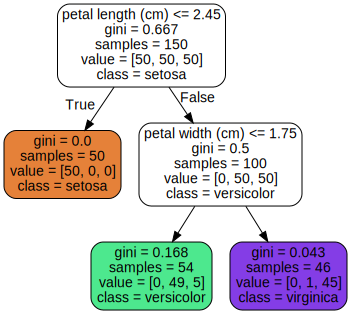

In [13]:
export_graphviz(clf,
out_file="iris_tree.dot",
feature_names=["petal length (cm)", "petal width (cm)"],
class_names=df.target_names,
rounded=True,
filled=True
)
Source.from_file("iris_tree.dot")

**Root:** the top node of tree, has no parent, and depth = 0<br>
**Split node:** has a parent and a child or children.<br>
**Leaf node:** has no children.<br>
**Samples attribute:** show how many instances it applies for. 
<br>
**Values:** represents the distribution of sample according to classes.
<br>
**Gini impurity(G):** node is pure if the gini=0, it happens when all the instances of noode belongs to same class<br>
\begin{align}
        G_i =1- \sum_{k=1}^n p_{i,k^2}
    \end{align}
    <br>
\begin{align}
        where ...  p_i,k^2: is. the. ratio. of. class. k. instances. among. the. training. instances. in. the. i. node.
    \end{align}
<br>

<br>

## **All nodes ask questions except leaves nodes.**


##***In our example***<br>
The root asks whether the flower’s petal length is smaller than 2.45 cm, if it exists so, it will move to root's left child node, and its prediction class is Setosa, If the flower is greater than 2.45 so, it will move to root's right child node.<br><br>
For the green node it has 54 instances 49 of them belongs to [versicolor], and the rest belongs to virginica, so the majority are versicolor so, it classifies them as versicolor.<br><br>
Gini of left child node of root:<br> 1 - [ (50/50) + (0/50) + (0/50) ] = 0<br> therefore the node is pure as gini = 0, and all the instances of this node belong to same class.

In [14]:
# predicting a new flower, 5 cm long, and 1.5 cm wide
print(f"predicted probability: {clf.predict_proba([[5,1.5]]).round(2)}")
# the output is the probability for which class does this flower belongs to.
# so, it is obvious that it belongs to class [1], highest probaility
print(f"predicted class: {clf.predict([[5,1.5]])}")

predicted probability: [[0.   0.91 0.09]]
predicted class: [1]


# CART Training Algorithm(Classification and Regression Tree), Greedy Algorithm
<br>
The algorithm work by first splitting the training set into 2 subsets using single feature (k) and a threshold (t), but how it chooses them?<br>
It searches for the purest subsets, minimizing cost function.<br><br>
\begin{align}
        J(k,t) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right} 
    \end{align}
<br>
where m is the number of instances in subset, and G is the impurity of subset.<br>
The tree will work like that untill it reaches the max depth , or it can't find any other split that will reduce impurity (like in our previous tree the impurity starts with a big impurity in root, and then the left child of root has impurity = 0, then the rest has iimpurity less than root).

# Entropy: measures the impurity of node
Can be selected by setting **criterion** = "entropy", but what is the difference between entropy and gini, the difference is that entropy has max impurity = 1, while gini has max impurty = 0.5 which will be the best in feature selection, btw it is the default usage of Decision Tree Classifier.<br>
\begin{align}
       H_i =- \sum_{k=1}^n p_{i,k}\log_2(p_{i,k})
\\  where\ p_{i,k}\ not\ equal \ zero
    \end{align}
    


# Regularization Hyperparameters<br>
Trees tends ot overfit because the number of parameters isn't determined prior to training so, the model is free to stick closely to the data.<br><br>
To avoid overfitting we have to restrict tree's freedom during training, by adapting some hyperparameters like:<br>

1- **max_depth:** restrict max depth hich is none by default. <br>
2- **max_leaf_nodes:** max number of leaf nodes.<br>
3- **max_features:** max number of features that are evaluated for splitting nodes.<br>
4- **min_sample_split:** Minimum number of samples a node must have before it can be split.<br>
5- **min_sample_leaf:** Minimum number of samples a leaf node must have to be created.<br><br>Increasing any min. or reducing any max. hyperparameters will regularize model.


In [15]:
# now we will work on make_moons Dataset
X,y = make_moons(n_samples=150,noise=0.2,random_state=42)
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = DecisionTreeClassifier(min_samples_leaf=5,random_state=42)
clf1.fit(X,y)
clf2.fit(X,y)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

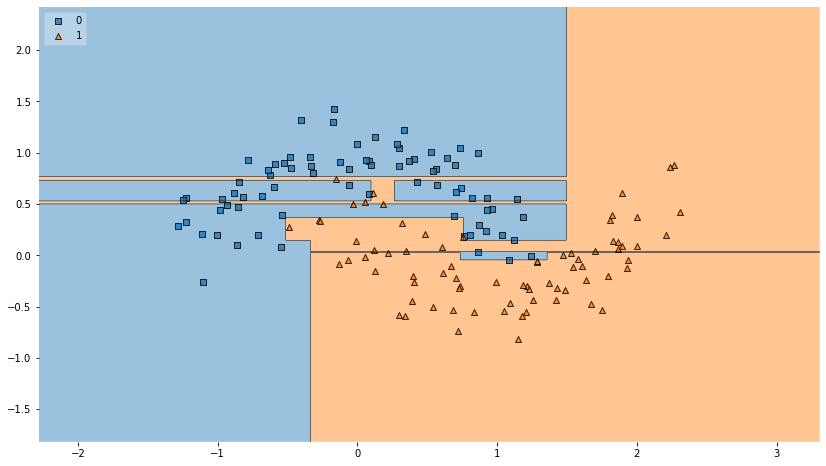

In [16]:
# plotting unregularized Tree
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
fig = plot_decision_regions(X=X, y=y, clf=clf1, legend=2)
plt.show()

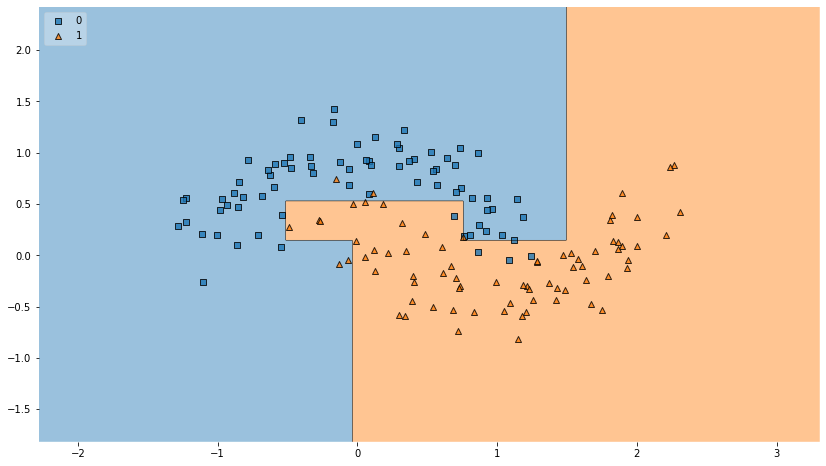

In [17]:
# plotting regularized Tree
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
fig = plot_decision_regions(X=X, y=y, clf=clf2, legend=2)
plt.show()

# We can see the difference between both plots the unregularized tree is overfitting, while regularized ones is good and will genaralize better as we will test both of them now.

In [18]:
X_test, y_test = make_moons(n_samples=1000, noise=0.2,random_state=43)
print(f"Score of unregularized tree: {clf1.score(X_test,y_test)}\nScore of regularized tree: {clf2.score(X_test,y_test)}")

Score of unregularized tree: 0.898
Score of regularized tree: 0.92


# As we see the regularized one genaralize better.

# Let's try a Regression task

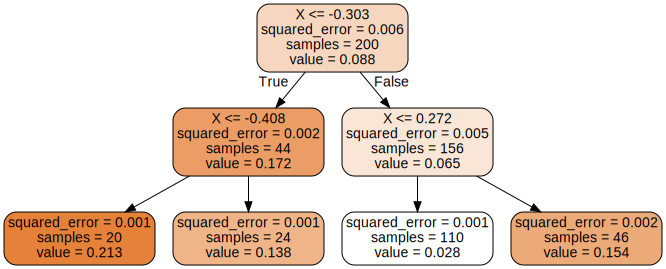

In [19]:
np.random.seed(42)
X = np.random.rand(200, 1) - 0.5 
y = X ** 2 + 0.025 * np.random.randn(200, 1)
r_clf = DecisionTreeRegressor(max_depth=2, random_state=42)
r_clf.fit(X, y)
export_graphviz(r_clf,
out_file="r_clf.dot",
feature_names='X',
rounded=True,
filled=True
)
Source.from_file("r_clf.dot")

# The regression tree looks like the classification ones, but it predicts a value instead of class <br>
If you want to predict a value = 0.08, so it is bigger than the root (-0.303) so, it will go right, therefore it is smaller than the roght node of root (0.272) so, it will go left, and the predicted value of (0.08) = 0.028<br><br>
if you calculated the error between (0.08) and the values of all leaves, you will get the least error at the predicted value (0.028).<br><br>
0.213-0.08 = 0.133<br>
0.138-0.08 = 0.058<br>
0.028-0.08 = 0.052<br>
0.154-0.08 = 0.075<br><br>
so, the least error at the predicted = 0.052, by neglecting sign it won't matter.

# The cost function of Classification task is trying to minimize impurity, while in regression tries to minimize Mean Squarred Error (MSE).

Cost Function for Regression:<br><br>
\begin{align}
        J(k,t) = \frac{m_{left}}{m}MSE_{left} + \frac{m_{right}}{m}MSE_{right} \\\\
    where\ MSE = ∑_{i=0}((yhat_{i})-y_i)^2
    \end{align}
    
<br>

# The problem of decision trees that they love orthogonal boundaries (all splits are orthogonal to x or y axis)

![image](https://user-images.githubusercontent.com/96451039/215435569-1d1aa9ac-cd7e-41a0-8334-cf72476fadda.png)


In this image the data on right is same as data on left but rotated by 45 degree, and the decision boundary looks complicated for no reason.<br><br>
**Solution:** Scale Data, then use PCA<br><br>
**PCA:** reduces correlation between features, which often make things easier for trees.

More generally, **the main issue** with decision trees is that they have quite a high
variance: small changes to the hyperparameters or to the data may produce very
different models. In fact, since the training algorithm used by Scikit-Learn is stochastic it randomly selects the set of features to evaluate at each node even retraining the
same decision tree on the exact same data may produce a very different model, unless you set the random_state hyperparameter.<br>